# Heigth_Weights Data Exploratory

## 1. glance of data

In [1]:
import pandas as pd

df = pd.read_csv('01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## 2. Distribution of height and weight

#### 2.1 Histogram and density

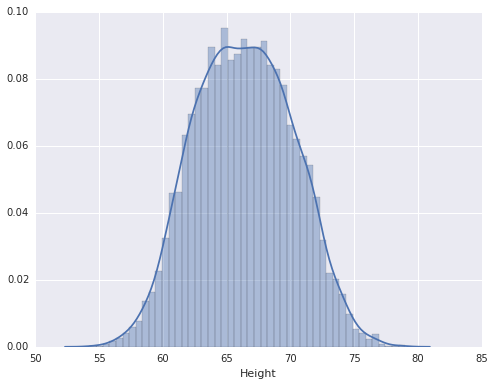

In [2]:
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize": (8, 6)})
sns.distplot(df['Height'])

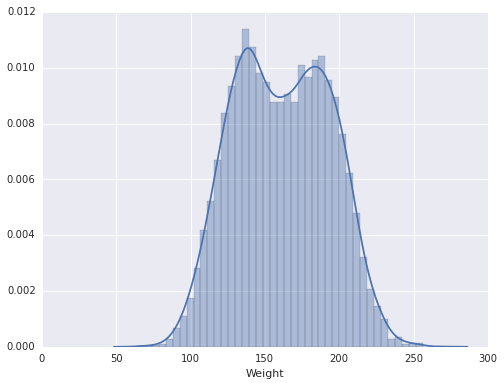

In [3]:
sns.distplot(df['Weight']);

As seen in the two density plot, there's hiden pattern in the data. So the third varible is added to the plot.

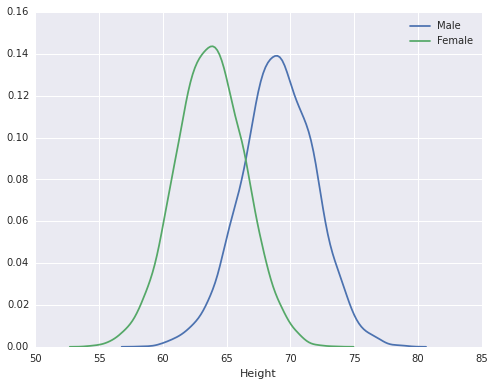

In [4]:
sns.distplot(df[df['Gender']=='Male']['Height'],hist=False,label='Male');
sns.distplot(df[df['Gender']=='Female']['Height'],hist=False,label="Female");

Now, it's clear that both male and female have a bell curve and it also expleained why the total curve has two peak.

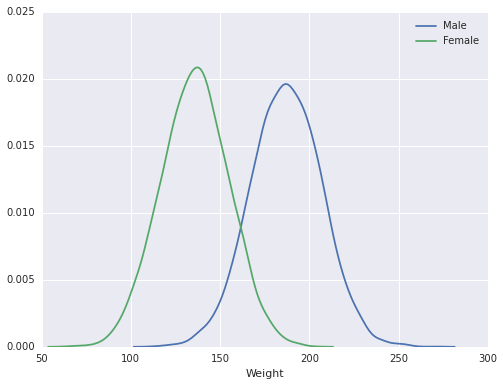

In [5]:
sns.distplot(df[df['Gender']=='Male']['Weight'],hist=False,label='Male');
sns.distplot(df[df['Gender']=='Female']['Weight'],hist=False,label="Female");

## 3. Correlation between weight and height

D:\Python27\lib\site-packages\matplotlib\collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


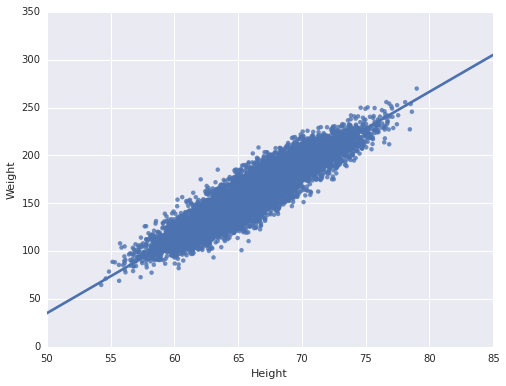

In [6]:
sns.regplot(x="Height", y="Weight", data=df)

As shown in the plot, height and weight have a strong correlation.

In [7]:
import scipy
p = scipy.stats.pearsonr(df['Height'],df['Weight'])
print "pearson correlation coeff = %s" % str(p[0])

pearson correlation coeff = 0.924756298741


 And next is a scatterplot of heights versus weights colored by gender with linear fit. 

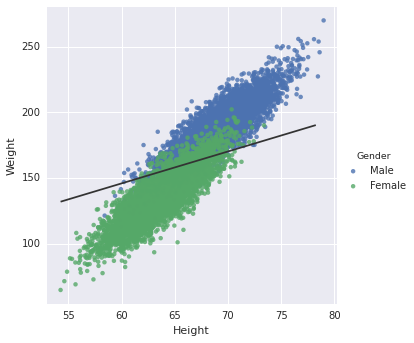

In [9]:
from ggplot import *
from sklearn.linear_model import LogisticRegression   
import numpy as np
import matplotlib.pyplot as plt

def score_to_numeric(x):
    if x=='Female':
        return 1
    if x=='Male':
        return 2

df['Gender_copy'] = df['Gender'].apply(score_to_numeric)
classifier = LogisticRegression()  # 使用类，参数全是默认的  
classifier.fit(df[['Height',"Weight"]], df['Gender_copy'])  # 训练数据来学习，不需要返回值  
xx, yy = np.mgrid[min(df['Height']):max(df['Height']):1, min(df['Weight']):max(df['Weight']):1]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)
g = sns.lmplot(x="Height", y="Weight", hue='Gender', data=df, fit_reg=False)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
plt.figure(figsize=(20, 10))

The line we’ve drawn has a very fancy-sounding name: the “separating hyperplane.”It’s a “separating” hyperplane because it splits the data into two groups: on one side, you guess that someone is female given her height and weight, and on the other side, you guess that he’s male. This is a pretty good way to make guesses